 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [101]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import yfinance as yf
import pandas_datareader.data as web
import csv

plt.style.use('fivethirtyeight')


%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Read the data from othe outside source and create the data frames to analyize

## Whale Returns

### Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
csvfile = Path('.\Resources\whale_returns.csv')
whale_df = pd.read_csv(csvfile)

# Algorithm Tradind No. 1 and Algorithm Trading No. 2 Returns

### Read these algorithms historic daily returns to create a data frame from the data and compare with other portfolios


In [3]:
# Reading algorithmic returnsdata_algo_returns.csv
csvfile = Path('Resources\data_algo_returns.csv')
algo_df = pd.read_csv(csvfile, header='infer', parse_dates=True, infer_datetime_format=True)

# S&P 500 Returns

### Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 


In [4]:
# Reading S&P 500 Closing Prices
csvfile = Path('Resources\sp500_history.csv')
sp500_hst_df = pd.read_csv(csvfile, header='infer', parse_dates=True, infer_datetime_format=True)

## Review the data, the amount, the condition, the types of the columns, the index and order

In [5]:
# check the size and dimensions:
whale_df.shape

(1060, 5)

In [6]:
# check the columns, quantity and types
whale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         1060 non-null   object 
 1   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 2   PAULSON & CO.INC.            1059 non-null   float64
 3   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 4   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4), object(1)
memory usage: 41.5+ KB


In [7]:
# check the basic 
whale_df.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341


In [8]:
whale_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [9]:
whale_df['Date'] = pd.to_datetime(whale_df['Date'])

In [10]:
whale_df = whale_df.set_index(pd.DatetimeIndex(whale_df['Date']))
whale_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-02,2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
2019-04-25,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,2019-04-29,0.001254,0.002719,0.006251,0.005223


In [11]:
del whale_df['Date']
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [12]:
whale_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


In [13]:
algo_df.shape

(1241, 3)

In [14]:
algo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1241 non-null   object 
 1   Algo 1  1241 non-null   float64
 2   Algo 2  1235 non-null   float64
dtypes: float64(2), object(1)
memory usage: 29.2+ KB


In [15]:
algo_df.describe()

,Algo 1,Algo 2
count,1241.000000,1235.000000
mean,0.000667,0.000341
std,0.007972,0.008466
min,-0.030951,-0.036937
25%,-0.003238,-0.003733
50%,0.000135,0.000581
75%,0.003978,0.005194
max,0.098246,0.083734


In [16]:
algo_df

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [17]:
algo_df['Date'] = pd.to_datetime(algo_df['Date'])

In [18]:
algo_df = algo_df.set_index(pd.DatetimeIndex(algo_df['Date']))
algo_df

,Date,Algo 1,Algo 2
Date,,,
2014-05-28,2014-05-28,0.001745,NaN
2014-05-29,2014-05-29,0.003978,NaN
2014-05-30,2014-05-30,0.004464,NaN
2014-06-02,2014-06-02,0.005692,NaN
2014-06-03,2014-06-03,0.005292,NaN
...,...,...,...
2019-04-25,2019-04-25,0.000682,-0.007247
2019-04-26,2019-04-26,0.002981,0.005256
2019-04-29,2019-04-29,0.005208,0.002829


In [19]:
del algo_df['Date']
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [20]:
algo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB


In [21]:
sp500_hst_df.shape

(1649, 2)

In [22]:
sp500_hst_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1649 non-null   object
 1   Close   1649 non-null   object
dtypes: object(2)
memory usage: 25.9+ KB


In [23]:
sp500_hst_df['Close']

0       $2933.68
1       $2907.97
2       $2905.03
3       $2900.45
4       $2907.06
          ...   
1644    $1460.93
1645    $1461.40
1646    $1450.99
1647    $1445.75
1648    $1444.49
Name: Close, Length: 1649, dtype: object

In [24]:
sp500_hst_df['Close'] = sp500_hst_df['Close'].str.replace('$', '', regex = False)
sp500_hst_df.head()

,Date,Close
0,23-Apr-19,2933.68
1,22-Apr-19,2907.97
2,18-Apr-19,2905.03
3,17-Apr-19,2900.45
4,16-Apr-19,2907.06


In [25]:
sp500_hst_df['Close'] = sp500_hst_df['Close'].astype(float)
sp500_hst_df

,Date,Close
0,23-Apr-19,2933.68
1,22-Apr-19,2907.97
2,18-Apr-19,2905.03
3,17-Apr-19,2900.45
4,16-Apr-19,2907.06
...,...,...
1644,5-Oct-12,1460.93
1645,4-Oct-12,1461.40
1646,3-Oct-12,1450.99
1647,2-Oct-12,1445.75


In [26]:
sp500_hst_df.describe()

,Close
count,1649.000000
mean,2154.279460
std,402.122004
min,1353.330000
25%,1880.050000
50%,2089.140000
75%,2473.450000
max,2933.680000


In [27]:
sp500_hst_df

,Date,Close
0,23-Apr-19,2933.68
1,22-Apr-19,2907.97
2,18-Apr-19,2905.03
3,17-Apr-19,2900.45
4,16-Apr-19,2907.06
...,...,...
1644,5-Oct-12,1460.93
1645,4-Oct-12,1461.40
1646,3-Oct-12,1450.99
1647,2-Oct-12,1445.75


In [28]:
sp500_hst_df['Date'] = pd.to_datetime(sp500_hst_df['Date'])

In [29]:
sp500_hst_df = sp500_hst_df.set_index(pd.DatetimeIndex(sp500_hst_df['Date']))
sp500_hst_df

,Date,Close
Date,,
2019-04-23,2019-04-23,2933.68
2019-04-22,2019-04-22,2907.97
2019-04-18,2019-04-18,2905.03
2019-04-17,2019-04-17,2900.45
2019-04-16,2019-04-16,2907.06
...,...,...
2012-10-05,2012-10-05,1460.93
2012-10-04,2012-10-04,1461.40
2012-10-03,2012-10-03,1450.99


In [30]:
del sp500_hst_df['Date']
sp500_hst_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [31]:
# Use the `rename` function to change the `Name` column to `Members`
sp500_hst_df.rename(columns = {'Close' : 'SP500 Close'}, inplace=True)
sp500_hst_df

,SP500 Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [32]:
sp500_hst_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SP500 Close  1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


In [33]:
sp500_hst_df

,SP500 Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [34]:
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [35]:
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [36]:
sp500_hst_df

,SP500 Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


## Check quality of data.

1. Elimiminate null or empty fields or empty columms or rows
2. Check for duplicated data
3. 

## Check for nulls or missing data, also check for duplicate records

In [37]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [38]:
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [39]:
algo_df = algo_df.dropna()
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [40]:
algo_df.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [41]:
sp500_hst_df = sp500_hst_df.dropna()
sp500_hst_df

,SP500 Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [42]:
sp500_hst_df.isna().sum()

SP500 Close    0
dtype: int64

In [43]:
whale_df = whale_df.drop_duplicates()

In [44]:
whale_df.duplicated().sum()

0

In [45]:
sp500_hst_df.drop_duplicates(inplace=True)


In [46]:
sp500_hst_df.duplicated().sum()

0

In [47]:
sp500_dr = sp500_hst_df.pct_change()

<AxesSubplot:xlabel='Date'>

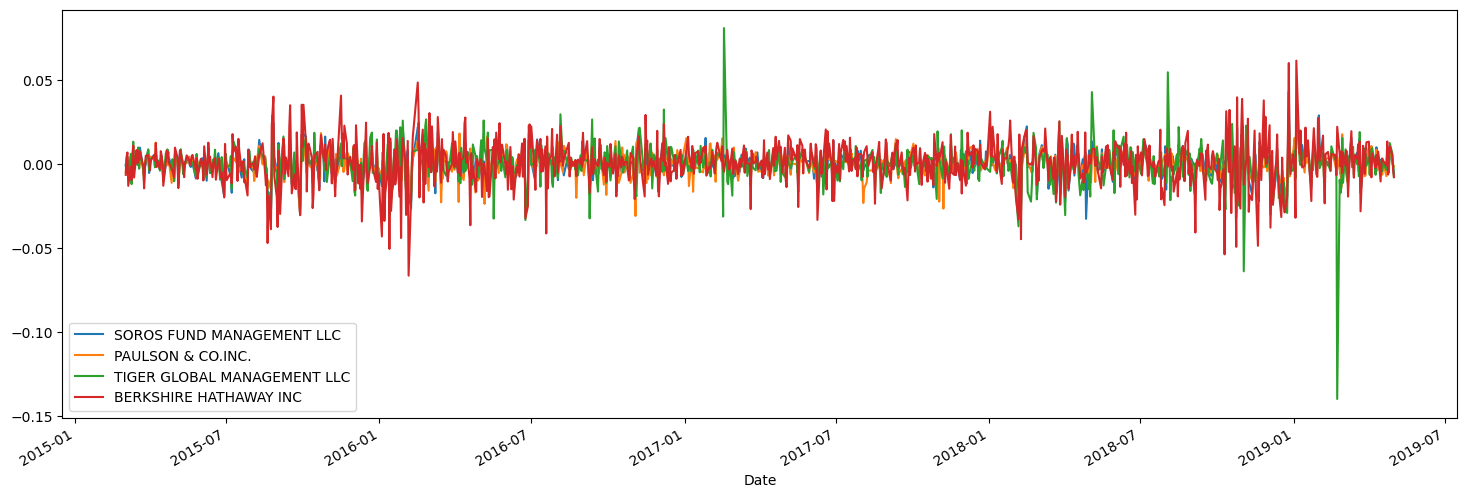

In [48]:
whale_df.plot(figsize=(18, 6))

<AxesSubplot:xlabel='Date'>

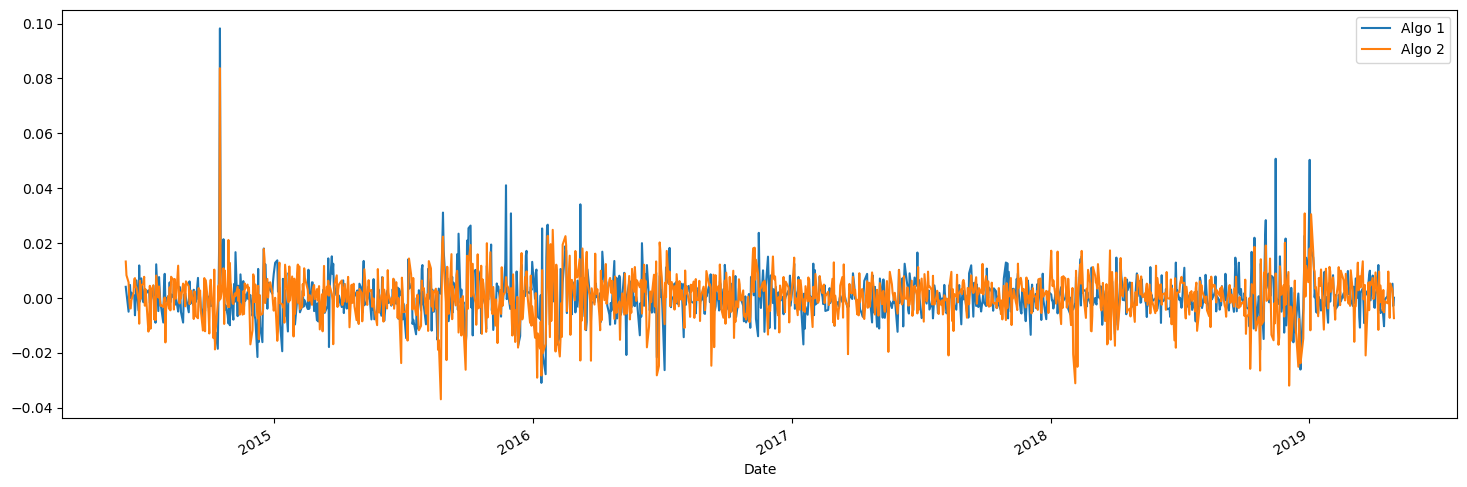

In [49]:
algo_df.plot(figsize=(18, 6))

<AxesSubplot:xlabel='Date'>

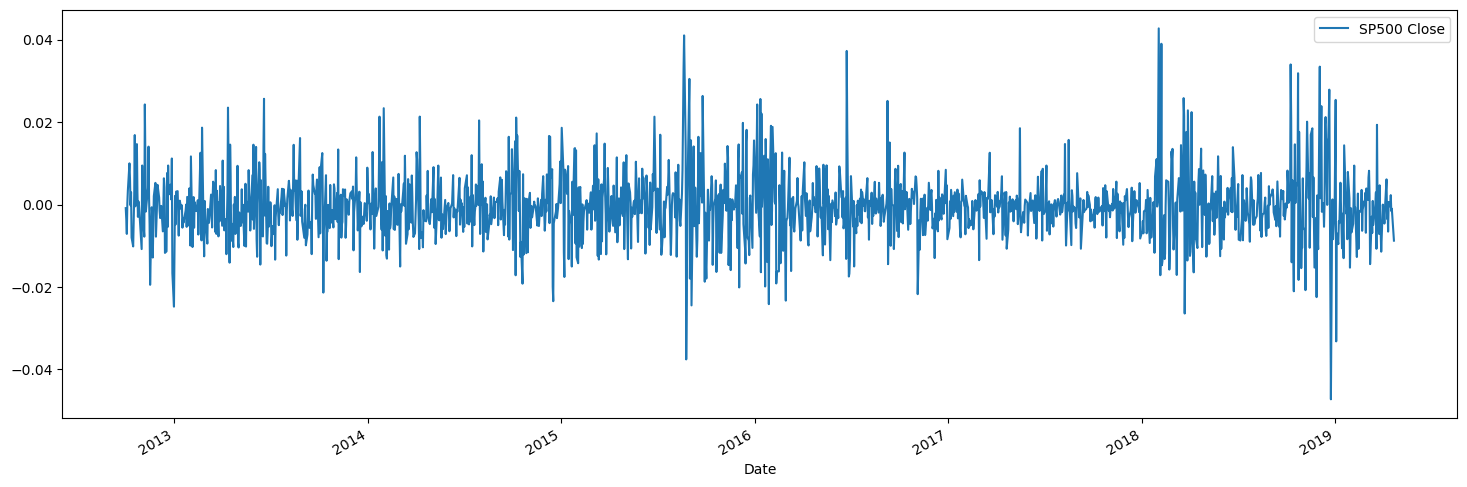

In [50]:
sp500_dr.plot(figsize=(18, 6))


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [51]:
# Count nulls

In [52]:
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


array([[<AxesSubplot:title={'center':'SOROS FUND MANAGEMENT LLC'}>,
        <AxesSubplot:title={'center':'PAULSON & CO.INC. '}>],
       [<AxesSubplot:title={'center':'TIGER GLOBAL MANAGEMENT LLC'}>,
        <AxesSubplot:title={'center':'BERKSHIRE HATHAWAY INC'}>]],
      dtype=object)

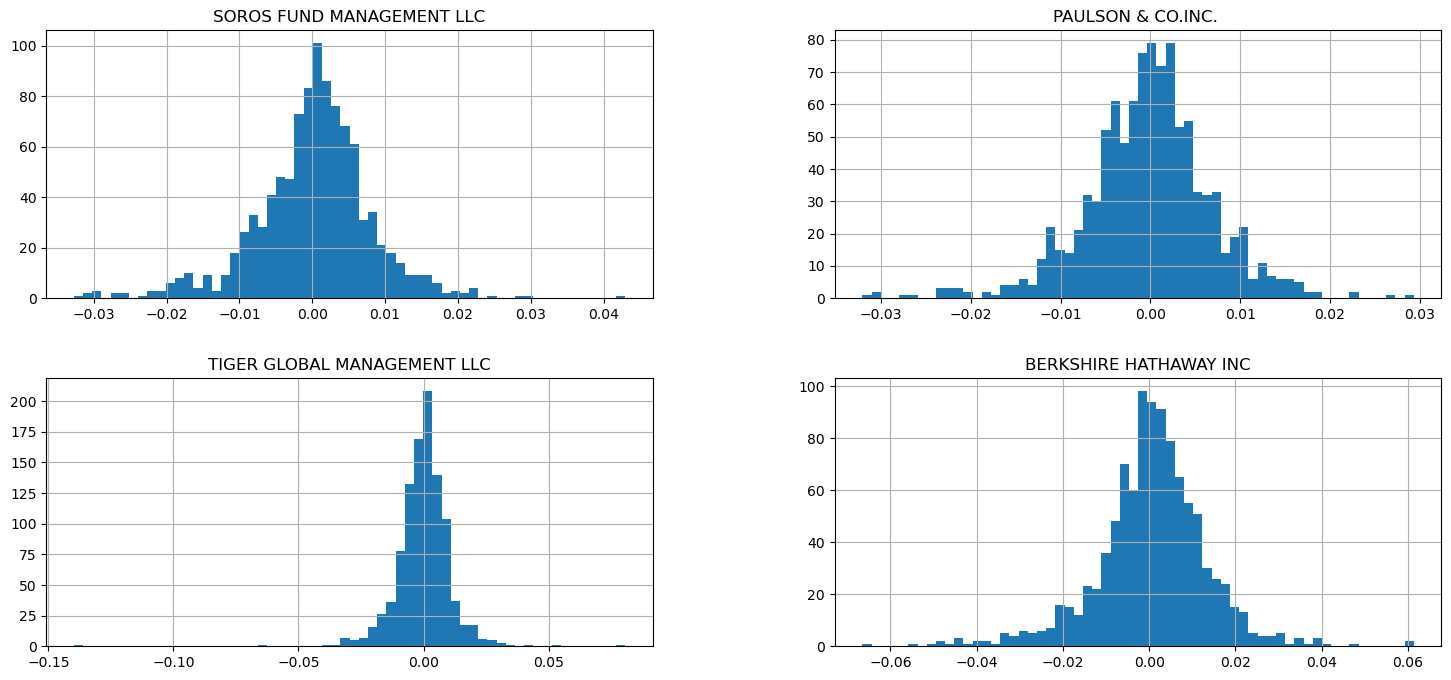

In [53]:
whale_df.hist(bins=60, figsize = (18,8))

array([[<AxesSubplot:title={'center':'Algo 1'}>,
        <AxesSubplot:title={'center':'Algo 2'}>]], dtype=object)

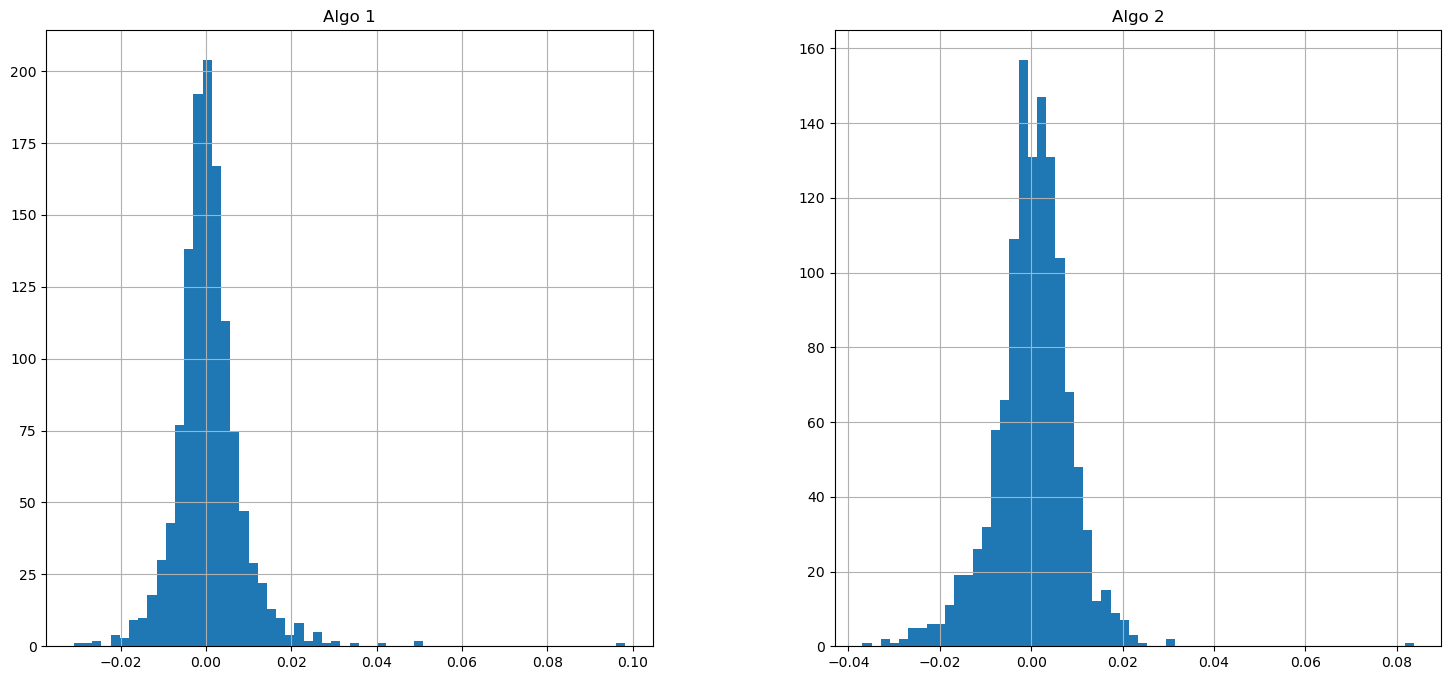

In [54]:
algo_df.hist(bins=60, figsize = (18,8))

array([[<AxesSubplot:title={'center':'SP500 Close'}>]], dtype=object)

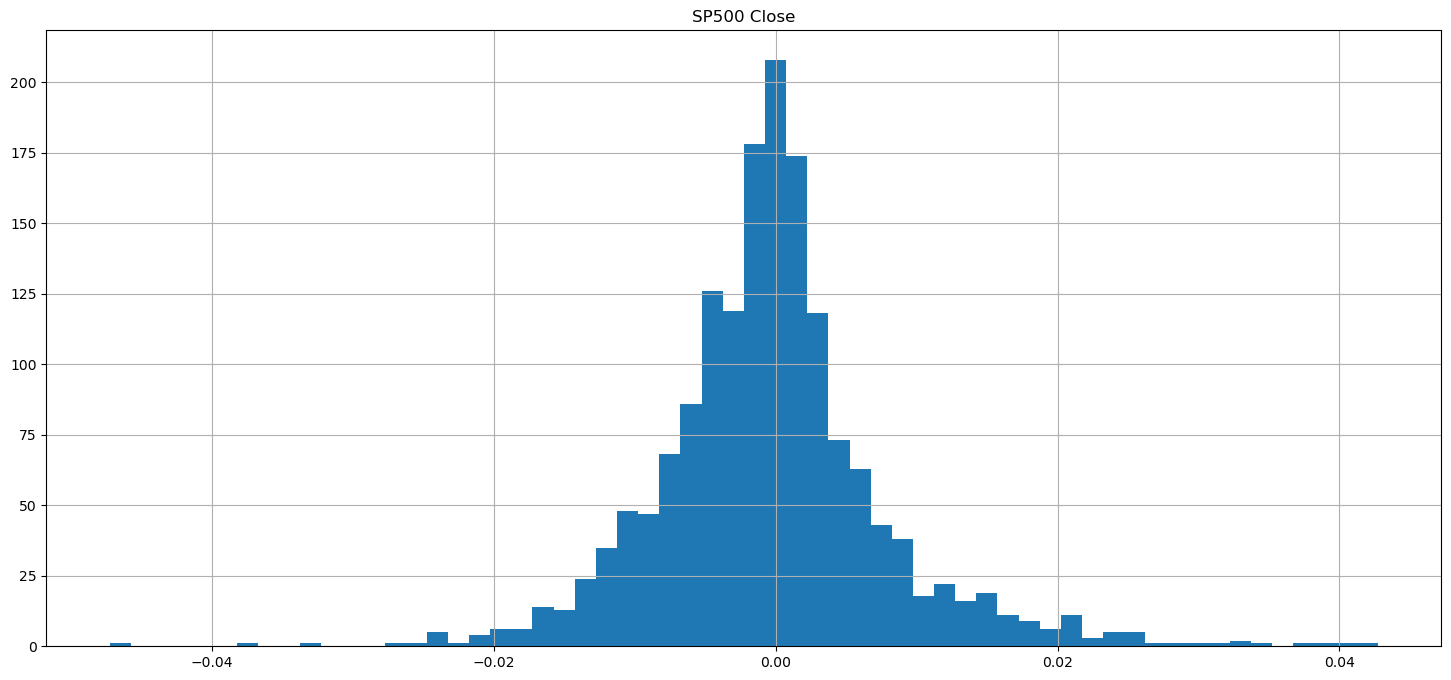

In [55]:
sp500_dr.hist(bins=60, figsize = (18,8))

# S&P 500 Returns
## Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 


# Check Data Types
# Drop nulls
sp500_hst_df.isna().sum()

## Get the information, description and composition of the SP500 data frame

### Get the information, description and data types of the SP500 data frame

# sp500_hst_df

In [56]:
# Rename `Close` Column to be specific to this portfolio.


## Combine Whale, Algorithmic, and S&P 500 Returns

In [57]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combo_cf = pd.concat([whale_df, algo_df, sp500_dr], axis='columns', join='inner')

# Sort datetime index in ascending order (past to present)
combo_cf.sort_index(inplace=True)

# Use the `rename` function to change the `Name` column to `Members`
combo_cf.rename(columns = {'SP500 Close' : 'SP500 Return', 'Algo 1' : 'Algo 1 Return', 'Algo 2' : 'Algo 2 Return'}, inplace=True)

# Display a few rows
combo_cf

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1 Return,Algo 2 Return,SP500 Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011


In [58]:
combo_cf

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1 Return,Algo 2 Return,SP500 Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [59]:
# Plot daily returns of all portfolios


#### Calculate and Plot cumulative returns.

In [60]:
# Calculate cumulative returns of all portfolios
# Use the `cumprod` function to cumulatively multiply each element in the Series by it's preceding element until the end
cum_returns = (1 + combo_cf).cumprod() - 1
cum_returns.head()
# Plot cumulative returns


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1 Return,Algo 2 Return,SP500 Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,0.003208
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,0.017632
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,0.013634
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,0.031123


In [61]:
cum_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1 Return,Algo 2 Return,SP500 Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,0.003208
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,0.017632
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,0.013634
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,0.031123
...,...,...,...,...,...,...,...
2019-04-16,0.131572,-0.227121,-0.136641,0.496254,0.955666,0.228673,-0.206810
2019-04-17,0.128294,-0.232120,-0.140448,0.501075,0.935520,0.222250,-0.208061
2019-04-18,0.129927,-0.231181,-0.139948,0.503951,0.934382,0.220747,-0.208861


In [62]:
soros_dr = combo_cf['SOROS FUND MANAGEMENT LLC']
paulson_dr = combo_cf["PAULSON & CO.INC. "]
tiger_glb_dr = combo_cf['TIGER GLOBAL MANAGEMENT LLC']
berkshire_dr = combo_cf['BERKSHIRE HATHAWAY INC']
algo_1_dr = combo_cf['Algo 1 Return']
algo_2_dr = combo_cf['Algo 2 Return']
sp500_dr = combo_cf['SP500 Return']

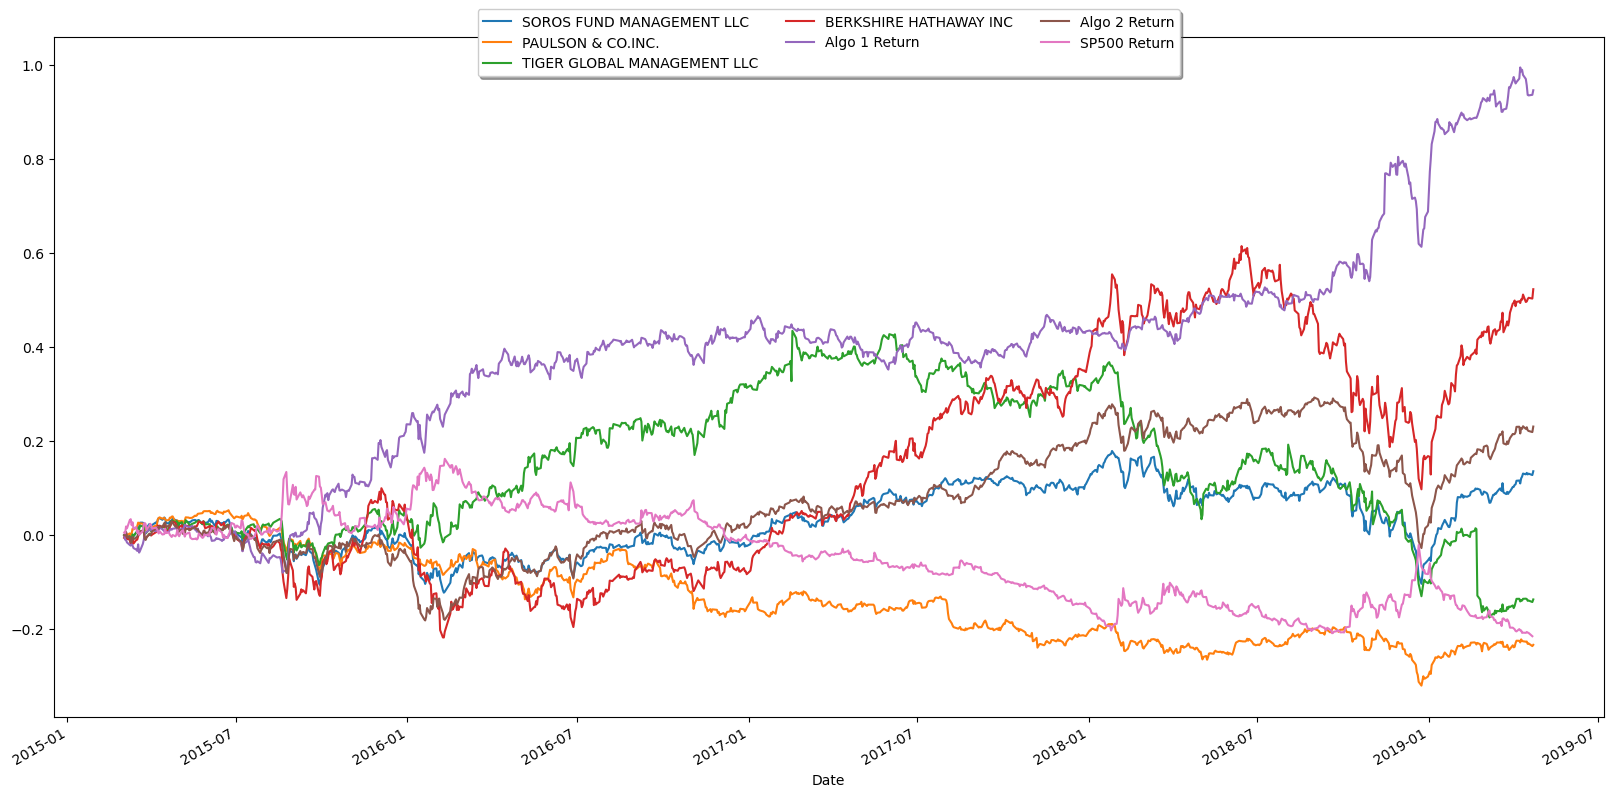

In [63]:

plt = cum_returns.plot(figsize = (20,10))
# plt.soros_dr.plot(label='Soros', figsize=(18,10))
# plt.plot(paulson_dr, label='Paulson')
# plt.plot(tiger_glb_dr, label='Tiger Global')
# plt.plot(berkshire_dr, label='Berkshire')
# plt.plot(algo_1_dr, label='Algo 1')
# plt.plot(algo_2_dr, label='Algo 2')
# plt.plot(sp500_dr, label='S&P 500')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

# plt.title('Cummulative Return Graph of All Portfolios')


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


In [64]:
combo_cf.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC',
       'Algo 1 Return', 'Algo 2 Return', 'SP500 Return'],
      dtype='object')

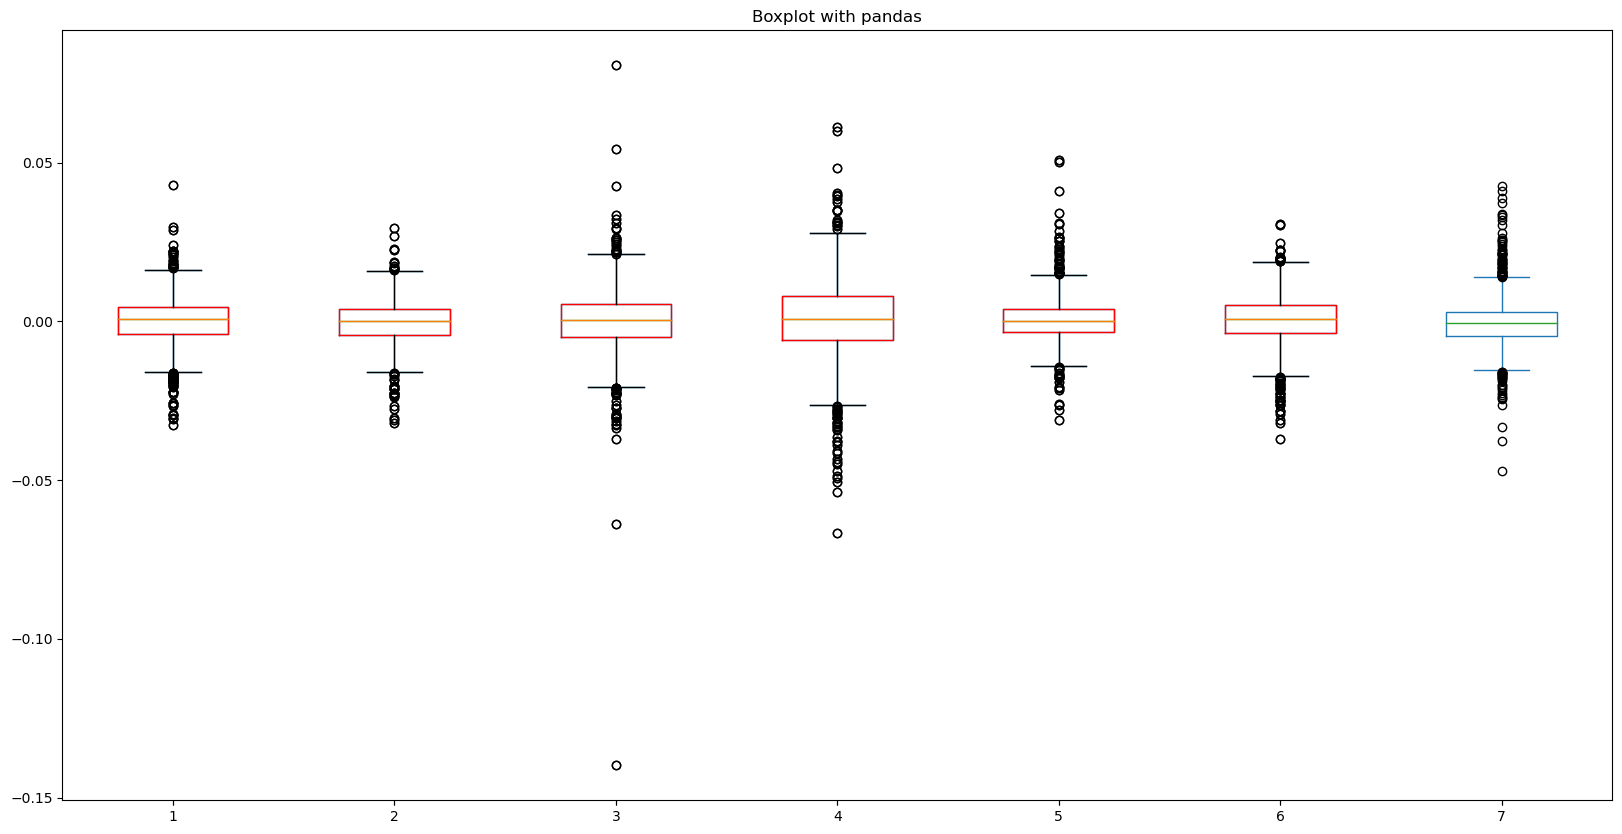

In [65]:
# Box plot to visually show risk
plt = combo_cf.plot.box(title='Boxplot with pandas', figsize = (20, 10));
plt.boxplot(combo_cf, boxprops=dict(color='red'))
plt.columns=['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1 Return', 'Algo 2 Return', 'SP500 Return']


### Calculate Standard Deviations

1.- Calculate the standard deviation for all portfolios

In [66]:
soros_std = combo_cf['SOROS FUND MANAGEMENT LLC'].std()

In [67]:
paulson_std = combo_cf["PAULSON & CO.INC. "].std()

In [68]:
tiger_glb_std = combo_cf['TIGER GLOBAL MANAGEMENT LLC'].std()

In [69]:
berkshire_std = combo_cf['BERKSHIRE HATHAWAY INC'].std()

In [70]:
algo_1_std = combo_cf['Algo 1 Return'].std()

In [71]:
algo_2_std = combo_cf['Algo 2 Return'].std()

In [72]:
sp500_std = combo_cf['SP500 Return'].std()

In [73]:
soros_dr = combo_cf['SOROS FUND MANAGEMENT LLC']
paulson_dr = combo_cf["PAULSON & CO.INC. "]
tiger_glb_dr = combo_cf['TIGER GLOBAL MANAGEMENT LLC']
berkshire_dr = combo_cf['BERKSHIRE HATHAWAY INC']
algo_1_dr = combo_cf['Algo 1 Return']
algo_2_dr = combo_cf['Algo 2 Return']
sp500_dr = combo_cf['SP500 Return']

<AxesSubplot:>

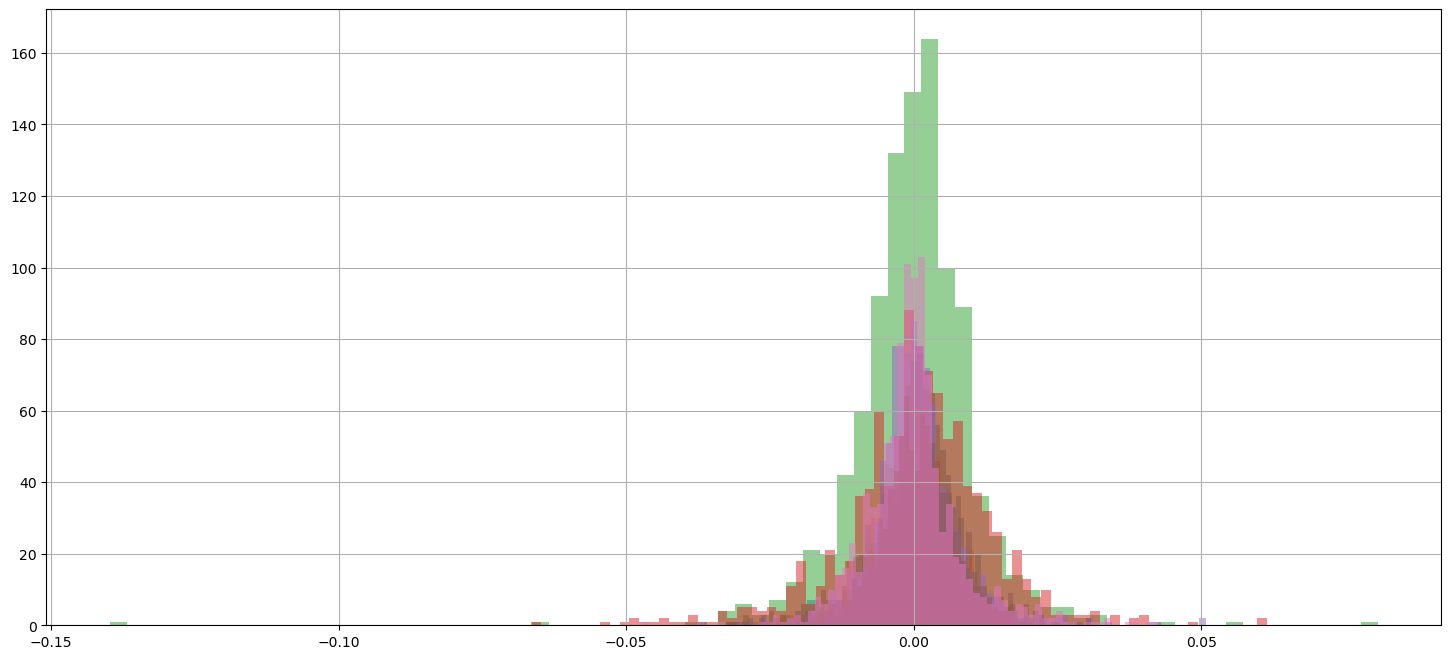

In [74]:
soros_dr.hist(bins = 75, label = 'Soros', alpha=0.5, figsize = (18, 8))
paulson_dr.hist(bins = 75, label = 'Paulson', alpha=0.5, figsize = (18, 8))
tiger_glb_dr.hist(bins = 75, label = 'Tiger Global', alpha=0.5, figsize = (18, 8))
berkshire_dr.hist(bins = 75, label = 'Berkshire', alpha=0.5, figsize = (18, 8))
algo_1_dr.hist(bins = 75, label = 'Algo 1', alpha=0.5, figsize = (18, 8))
algo_2_dr.hist(bins = 75, label = 'Algo 2', alpha=0.5, figsize = (18, 8))
sp500_dr.hist(bins = 75, label = 'S&P 500', alpha=0.5, figsize = (18, 8))


## Calculate the daily standard deviations of all portfolios

In [75]:
soros_std = combo_cf['SOROS FUND MANAGEMENT LLC'].std()

In [76]:
paulson_std = combo_cf["PAULSON & CO.INC. "].std()

In [77]:
tiger_glb_std = combo_cf['TIGER GLOBAL MANAGEMENT LLC'].std()

In [78]:
berkshire_std = combo_cf['BERKSHIRE HATHAWAY INC'].std()

In [79]:
algo_1_std = combo_cf['Algo 1 Return'].std()

In [80]:
algo_2_std = combo_cf['Algo 2 Return'].std()

In [81]:
sp500_std = combo_cf['SP500 Return'].std()

## Compare the mean and the std for each portfolio:

In [82]:
stat_data = combo_cf.describe()

In [83]:
stat_data.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC',
       'Algo 1 Return', 'Algo 2 Return', 'SP500 Return'],
      dtype='object')

In [84]:
stat_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1 Return,Algo 2 Return,SP500 Return
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1006.000000
mean,0.000158,-0.000240,-0.000085,0.000504,0.000690,0.000240,-0.000205
std,0.008027,0.007122,0.011081,0.013133,0.007688,0.008330,0.008630
min,-0.032711,-0.032099,-0.139820,-0.066505,-0.030951,-0.036937,-0.047250
25%,-0.003859,-0.004214,-0.005016,-0.005803,-0.003252,-0.003777,-0.004438
50%,0.000646,0.000024,0.000510,0.000917,0.000069,0.000658,-0.000381
75%,0.004438,0.003816,0.005464,0.007867,0.003976,0.005203,0.002921
max,0.042977,0.029338,0.080705,0.061341,0.050735,0.030822,0.042730


In [85]:
stat_data = stat_data.rename(columns = {'SOROS FUND MANAGEMENT LLC':'S', 'PAULSON & CO.INC. ' : 'P', 'TIGER GLOBAL MANAGEMENT LLC' : 'T', 'BERKSHIRE HATHAWAY INC' : 'B', 'Algo 1 Return' : 'A1', 'Algo 2 Return' : 'A2', 'SP500 Return' : 'SP500' })

In [86]:
summary = stat_data.T

In [87]:
summary = summary.loc[:, ['mean', 'std']]

In [88]:
summary['mean'] = summary['mean'] *252
summary['std'] = summary['std'] * np.sqrt(252)
summary

,mean,std
S,0.039833,0.127422
P,-0.060354,0.113065
T,-0.021331,0.175898
B,0.126960,0.208478
A1,0.173974,0.122040
A2,0.060590,0.132240
SP500,-0.051537,0.136994


Text(0.5, 1.0, 'Risk / Return')

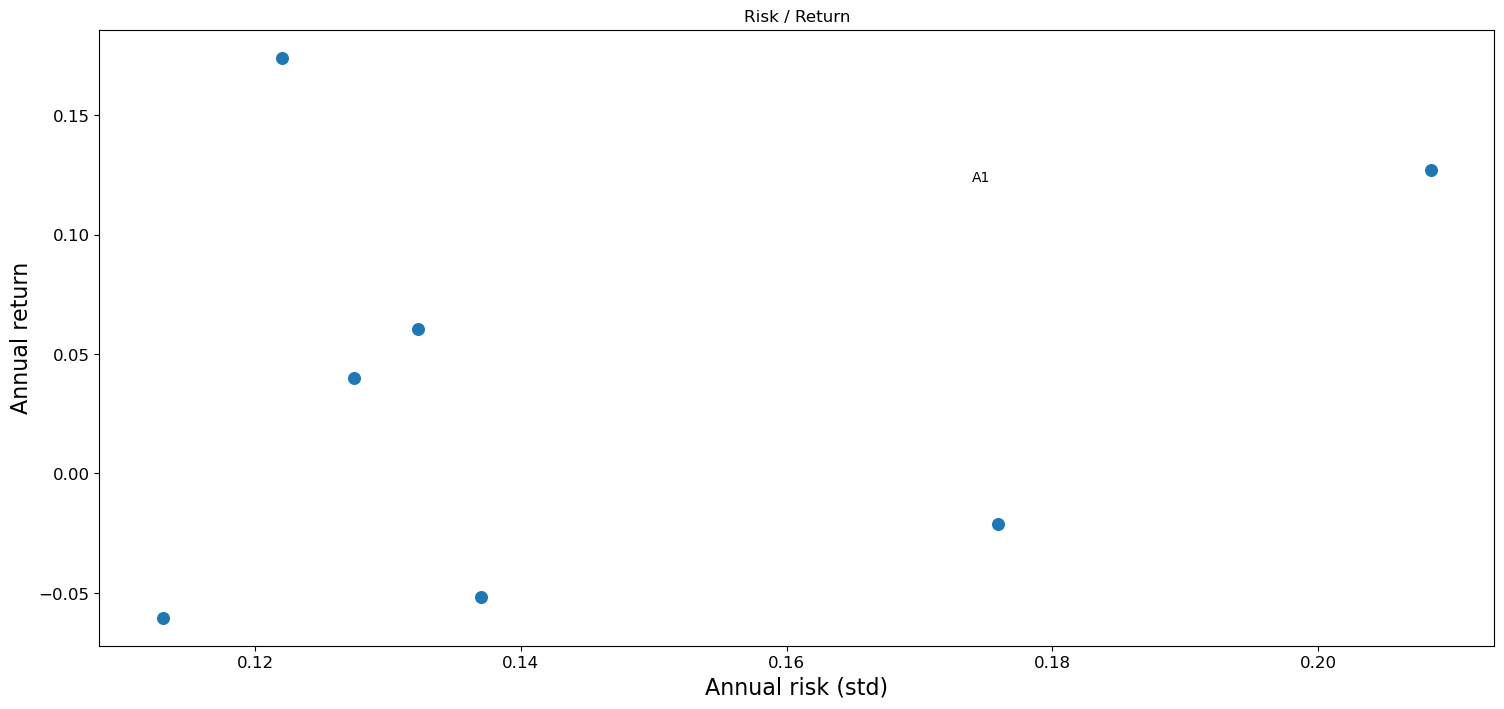

In [89]:
plt = summary.plot.scatter(x = 'std', y = 'mean', figsize = (18, 8), s=70, fontsize = 12)

for i in summary.index:
    plt.annotate(i, xy = (summary.loc[i,"mean"], summary.loc[i, "std"]))
    
plt.set_xlabel("Annual risk (std)", fontsize = 16)
plt.set_ylabel("Annual return", fontsize = 16)
plt.set_title("Risk / Return")

In [90]:
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, 'std'] + 0.002, summary.loc[i, 'mean']+0.002), size = 18)
    print( f"{summary.index}, std:{summary.loc[i, 'std']:2f}, mean:{summary.loc[i, 'mean']:2f}")
plt.show()

Index(['S', 'P', 'T', 'B', 'A1', 'A2', 'SP500'], dtype='object'), std:0.127422, mean:0.039833
Index(['S', 'P', 'T', 'B', 'A1', 'A2', 'SP500'], dtype='object'), std:0.113065, mean:-0.060354
Index(['S', 'P', 'T', 'B', 'A1', 'A2', 'SP500'], dtype='object'), std:0.175898, mean:-0.021331
Index(['S', 'P', 'T', 'B', 'A1', 'A2', 'SP500'], dtype='object'), std:0.208478, mean:0.126960
Index(['S', 'P', 'T', 'B', 'A1', 'A2', 'SP500'], dtype='object'), std:0.122040, mean:0.173974
Index(['S', 'P', 'T', 'B', 'A1', 'A2', 'SP500'], dtype='object'), std:0.132240, mean:0.060590
Index(['S', 'P', 'T', 'B', 'A1', 'A2', 'SP500'], dtype='object'), std:0.136994, mean:-0.051537


AttributeError: 'AxesSubplot' object has no attribute 'show'

### Determine which portfolios are riskier than the S&P 500

In [91]:
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [93]:
# calculate the total return per fund:
soros_dr.sum()
paulson_dr.sum()
tiger_glb_dr.sum()
berkshire_dr.sum()
algo_1_dr.sum()
algo_2_dr.sum()
sp500_dr.sum()

-0.2057379136839249

In [94]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500


### Calculate the Annualized Standard Deviation

In [95]:
# Calculate the annualized standard deviation (252 trading days)


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


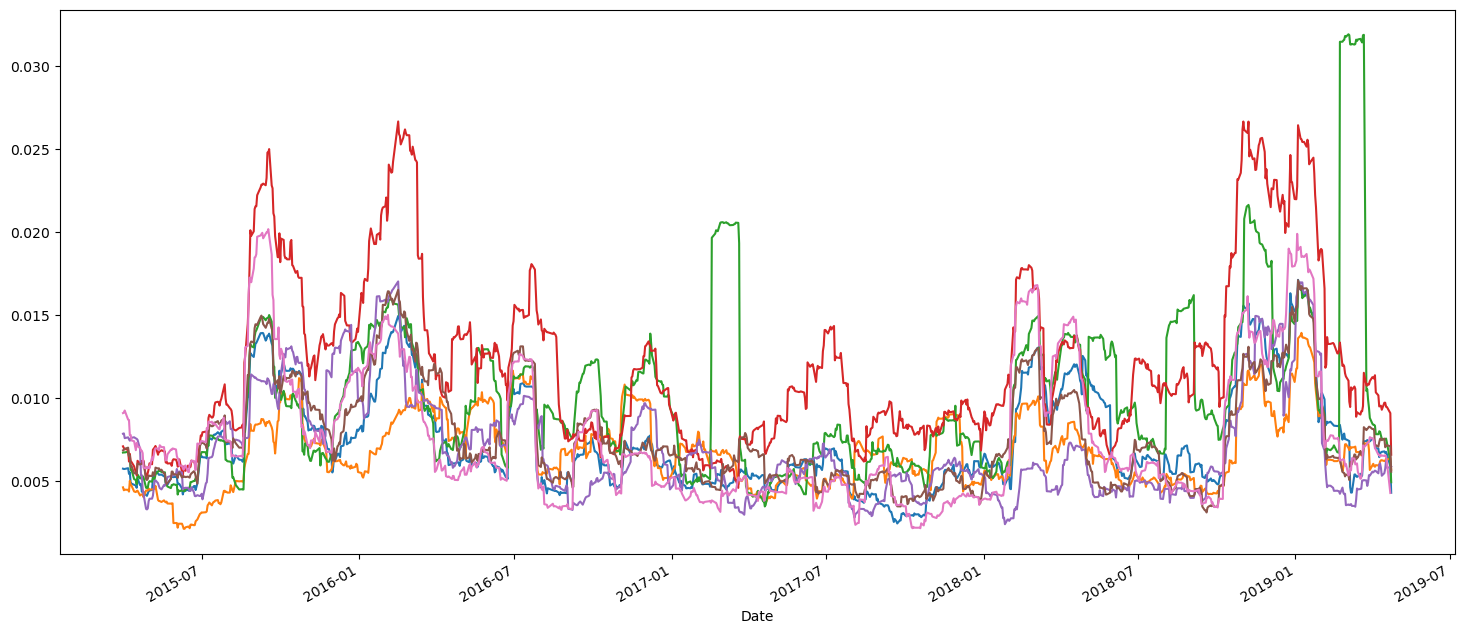

In [96]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# soros_dr = combo_cf['SOROS FUND MANAGEMENT LLC']
# paulson_dr = combo_cf["PAULSON & CO.INC. "]
# tiger_glb_dr = combo_cf['TIGER GLOBAL MANAGEMENT LLC']
# berkshire_dr = combo_cf['BERKSHIRE HATHAWAY INC']
# algo_1_dr = combo_cf['Algo 1 Return']
# algo_2_dr = combo_cf['Algo 2 Return']
# sp500_dr = combo_cf['SP500 Return']

soros_dr.rolling(window=21).std().plot(label = 'Soros', figsize = (18, 8))
paulson_dr.rolling(window=21).std().plot(label = 'Soros')
tiger_glb_dr.rolling(window=21).std().plot()
berkshire_dr.rolling(window=21).std().plot()
algo_1_dr.rolling(window=21).std().plot()
algo_2_dr.rolling(window=21).std().plot()
sp500_dr.rolling(window=21).std().plot()


plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)


# ax.legend(["MSFT", "MSFT 180 Day Mean"]);
# Plot the rolling standard deviation


<AxesSubplot:xlabel='Date'>

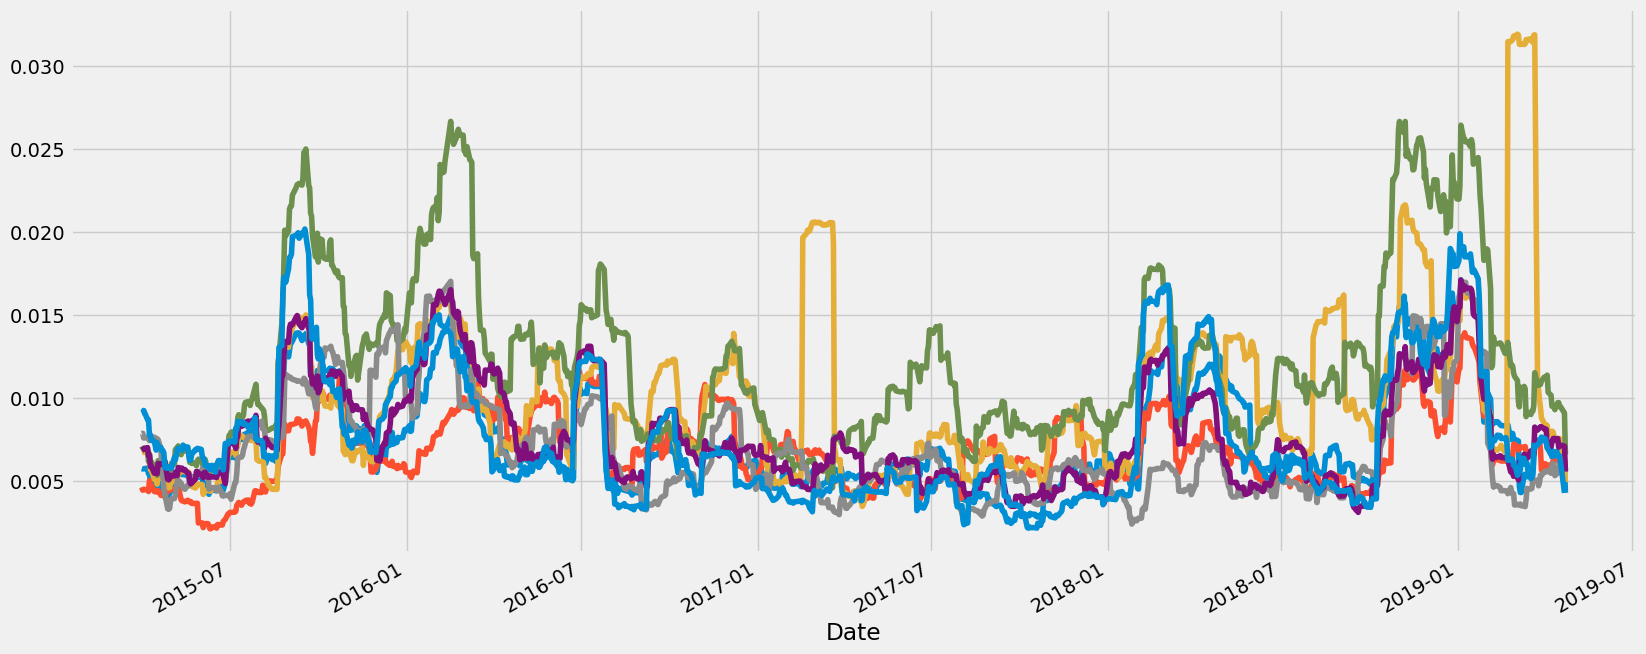

In [299]:
soros_dr.rolling(window=21).std().plot(label = 'Soros', figsize = (18, 8))
paulson_dr.rolling(window=21).std().plot(label = 'Soros')
tiger_glb_dr.rolling(window=21).std().plot()
berkshire_dr.rolling(window=21).std().plot()
algo_1_dr.rolling(window=21).std().plot()
algo_2_dr.rolling(window=21).std().plot()
sp500_dr.rolling(window=21).std().plot()

### Calculate and plot the correlation

<AxesSubplot:>

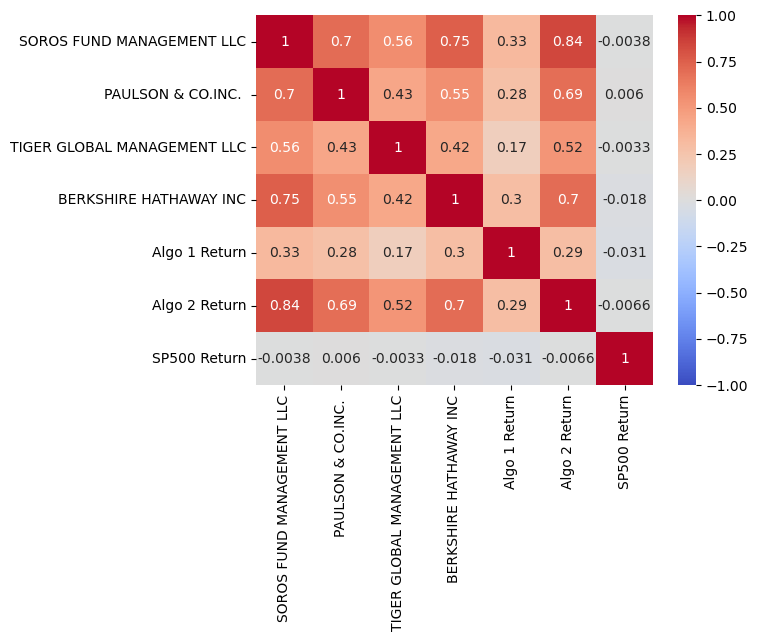

In [98]:
import seaborn as sns

# Calculate the correlation
price_correlation = combo_cf.corr()
# Display de correlation matrix
sns.heatmap(price_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of Algo 2 Returns vs. S&P 500 Returns'}, xlabel='Date'>

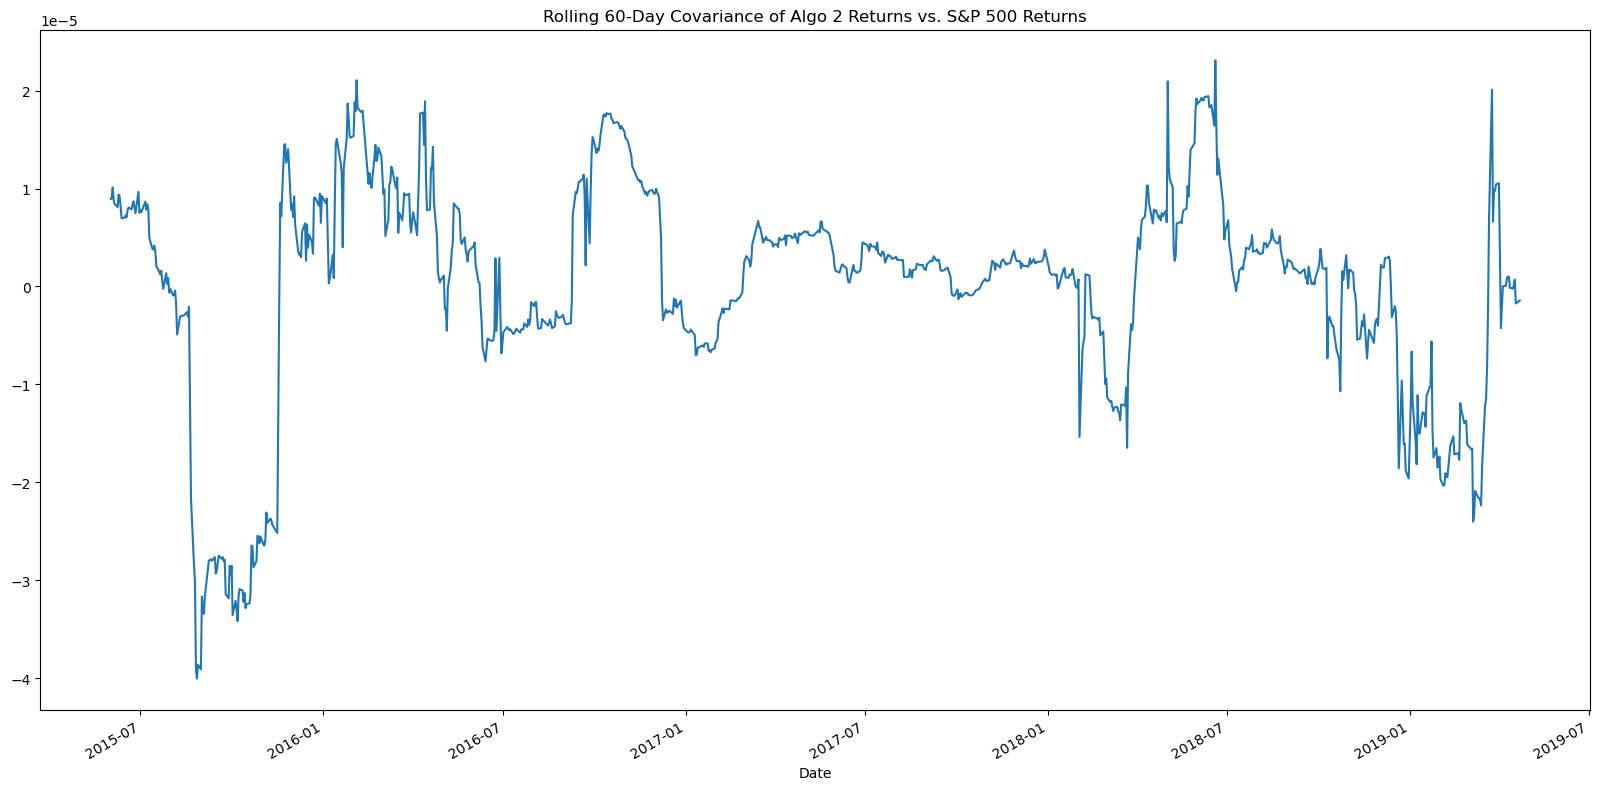

In [99]:
# Calculate covariance of a single portfolio and the S&P 500

covariance = combo_cf['Algo 2 Return'].cov(combo_cf['SP500 Return'])

# Calculate variance of the S&P 500
variance = combo_cf['SP500 Return'].var()

# Calculate beta of 'Algo 2' returns
algo_beta = covariance / variance

# Plot beta trend
# Calculate 60-day rolling beta of Algo 2 vs. S&P 500 and plot the data
rolling_covariance = combo_cf['Algo 2 Return'].rolling(window=60).cov(combo_cf['SP500 Return'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Algo 2 Returns vs. S&P 500 Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [249]:
start_d = dt.datetime(2022, 1, 1)
end_d = dt.datetime(2022, 12, 31)
print(start, end)

2022-12-01 00:00:00 2022-12-31 00:00:00


## this are the stocks we will taking a look at:
= tickers = ['MSFT', 'CRM', 'CAT', 'COST', 'HON', 'NKE']

## A detail of the parameters for the yf.download function:
yf.download(
    tickers,
    start=None,
    end=None,
    actions=False,
    threads=True,
    ignore_tz=None,
    group_by='column',
    auto_adjust=False,
    back_adjust=False,
    repair=False,
    keepna=False,
    progress=True,
    period='max',
    show_errors=True,
    interval='1d',
    prepost=False,
    proxy=None,
    rounding=False,
    timeout=10,
)

In [250]:
# Reading data from 1st stock
msft = yf.download('MSFT', start=start_d, end=end_d, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [251]:
# Reading data from 2nd stock
crm = yf.download('CRM', start=start_d, end=end_d, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [252]:
# Reading data from 3rd stock
cat = yf.download('CAT', start=start_d, end=end_d, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [253]:
cost = yf.download('COST', start = start_d, end=end_d, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [254]:
# hon = yf.download('HON', start=start_d, end=end_d, interval='1d')

In [255]:
nke = yf.download('NKE', start=start_d, end=end_d, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [294]:
spy = yf.download('SPY', start=start_d, end=end_d, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [256]:
tickers = ['MSFT', 'CRM', 'CAT', 'COST', 'NKE']
msft

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,335.350006,338.000000,329.779999,334.750000,330.813873,28865100
2022-01-04,334.829987,335.200012,326.119995,329.010010,325.141357,32674300
2022-01-05,325.859985,326.070007,315.980011,316.380005,312.659851,40054300
2022-01-06,313.149994,318.700012,311.489990,313.880005,310.189270,39646100
2022-01-07,314.149994,316.500000,310.089996,314.040009,310.347382,32720000
...,...,...,...,...,...,...
2022-12-23,236.110001,238.869995,233.940002,238.729996,238.133545,21207000
2022-12-27,238.699997,238.929993,235.830002,236.960007,236.367981,16688600
2022-12-28,236.889999,239.720001,234.169998,234.529999,233.944031,17457100


In [257]:
crm

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,255.009995,256.700012,248.649994,255.460007,255.460007,4316800
2022-01-04,256.850006,256.869995,243.399994,248.229996,248.229996,7240700
2022-01-05,236.169998,238.199997,227.309998,227.669998,227.669998,18882500
2022-01-06,228.039993,234.479996,226.050003,229.149994,229.149994,9376100
2022-01-07,228.500000,232.279999,226.050003,228.309998,228.309998,6286700
...,...,...,...,...,...,...
2022-12-23,128.729996,129.860001,127.589996,129.440002,129.440002,5821300
2022-12-27,128.559998,131.750000,127.650002,130.660004,130.660004,8300800
2022-12-28,129.710007,131.139999,128.169998,128.470001,128.470001,6249800


In [258]:
cat

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,207.330002,208.600006,205.800003,207.000000,201.285934,2055600
2022-01-04,208.279999,218.919998,207.940002,218.080002,212.060089,5242300
2022-01-05,218.179993,223.360001,218.179993,219.750000,213.684006,5378200
2022-01-06,221.490005,222.710007,218.059998,221.990005,215.862167,3913200
2022-01-07,222.500000,225.970001,222.229996,224.190002,218.001434,3673400
...,...,...,...,...,...,...
2022-12-23,236.949997,240.539993,236.500000,239.869995,238.731461,1959900
2022-12-27,240.690002,245.050003,239.720001,243.139999,241.985947,3381500
2022-12-28,243.139999,243.820007,238.279999,239.380005,238.243805,2270000


In [259]:
cost

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,565.030029,567.469971,555.510010,566.710022,561.965271,2714100
2022-01-04,564.229980,568.719971,561.789978,564.229980,559.506042,2097500
2022-01-05,563.690002,565.049988,549.770020,549.919983,545.315918,2887500
2022-01-06,546.200012,553.520020,543.549988,549.799988,545.196899,2503100
2022-01-07,547.549988,548.369995,534.239990,536.179993,531.690918,2323900
...,...,...,...,...,...,...
2022-12-23,457.519989,463.179993,454.799988,462.649994,461.846008,1229500
2022-12-27,464.399994,464.700012,457.109985,458.500000,457.703217,1230800
2022-12-28,457.540009,460.459991,452.799988,452.989990,452.202789,1324100


In [260]:
nke

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,167.529999,167.910004,163.309998,164.669998,162.456375,5670500
2022-01-04,165.880005,167.179993,165.000000,166.389999,164.153244,6064200
2022-01-05,166.490005,167.009995,162.100006,162.250000,160.068909,5021000
2022-01-06,162.089996,163.190002,159.059998,161.039993,158.875137,4144600
2022-01-07,160.770004,161.139999,156.860001,156.970001,154.859879,5108000
...,...,...,...,...,...,...
2022-12-23,116.110001,117.169998,115.779999,116.250000,115.919472,6603700
2022-12-27,116.470001,118.199997,115.820000,117.559998,117.225746,6661100
2022-12-28,117.580002,118.239998,114.959999,114.980003,114.653084,5437800


In [261]:
combi = pd.concat([msft.Close, crm.Close, cat.Close, cost.Close, nke.Close], axis='columns', join='inner')

In [263]:
# Combine all stocks in a single DataFrame
combi.columns = ['MSFT Close', 'CRM Close', 'CAT Close', 'COST Close', 'NKE Close']

In [264]:
# Reset Date index
combi

,MSFT Close,CRM Close,CAT Close,COST Close,NKE Close
Date,,,,,
2022-01-03,334.750000,255.460007,207.000000,566.710022,164.669998
2022-01-04,329.010010,248.229996,218.080002,564.229980,166.389999
2022-01-05,316.380005,227.669998,219.750000,549.919983,162.250000
2022-01-06,313.880005,229.149994,221.990005,549.799988,161.039993
2022-01-07,314.040009,228.309998,224.190002,536.179993,156.970001
...,...,...,...,...,...
2022-12-23,238.729996,129.440002,239.869995,462.649994,116.250000
2022-12-27,236.960007,130.660004,243.139999,458.500000,117.559998
2022-12-28,234.529999,128.470001,239.380005,452.989990,114.980003


In [265]:
# Reorganize portfolio data by having a column per symbol
combi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-01-03 to 2022-12-30
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MSFT Close  251 non-null    float64
 1   CRM Close   251 non-null    float64
 2   CAT Close   251 non-null    float64
 3   COST Close  251 non-null    float64
 4   NKE Close   251 non-null    float64
dtypes: float64(5)
memory usage: 19.9 KB


In [266]:
combi.describe()

,MSFT Close,CRM Close,CAT Close,COST Close,NKE Close
count,251.000000,251.000000,251.000000,251.000000,251.000000
mean,268.917091,176.666534,205.078008,510.216016,116.647371
std,25.761774,28.349300,20.564903,37.571862,17.720644
min,214.250000,128.270004,162.440002,416.429993,83.120003
25%,247.180000,155.530006,185.919998,482.504990,105.610001
50%,265.899994,172.300003,206.000000,510.299988,112.599998
75%,289.744995,196.184998,221.920006,533.354980,128.715004
max,334.750000,255.460007,243.139999,608.049988,166.389999


In [267]:
# Calculate daily returns
combi_rtn = combi.pct_change()

combi_rtn = combi_rtn.dropna()

combi_rtn


,MSFT Close,CRM Close,CAT Close,COST Close,NKE Close
Date,,,,,
2022-01-04,-0.017147,-0.028302,0.053527,-0.004376,0.010445
2022-01-05,-0.038388,-0.082826,0.007658,-0.025362,-0.024881
2022-01-06,-0.007902,0.006501,0.010193,-0.000218,-0.007458
2022-01-07,0.000510,-0.003666,0.009910,-0.024773,-0.025273
2022-01-10,0.000732,0.005782,-0.011374,-0.032414,-0.041600
...,...,...,...,...,...
2022-12-23,0.002267,0.001935,0.009809,0.008589,-0.003941
2022-12-27,-0.007414,0.009425,0.013632,-0.008970,0.011269
2022-12-28,-0.010255,-0.016761,-0.015464,-0.012017,-0.021946


In [268]:
# Drop NAs
combi_rtn.isna().sum()


MSFT Close    0
CRM Close     0
CAT Close     0
COST Close    0
NKE Close     0
dtype: int64

In [270]:
# Display sample data
combi_rtn

,MSFT Close,CRM Close,CAT Close,COST Close,NKE Close
Date,,,,,
2022-01-04,-0.017147,-0.028302,0.053527,-0.004376,0.010445
2022-01-05,-0.038388,-0.082826,0.007658,-0.025362,-0.024881
2022-01-06,-0.007902,0.006501,0.010193,-0.000218,-0.007458
2022-01-07,0.000510,-0.003666,0.009910,-0.024773,-0.025273
2022-01-10,0.000732,0.005782,-0.011374,-0.032414,-0.041600
...,...,...,...,...,...
2022-12-23,0.002267,0.001935,0.009809,0.008589,-0.003941
2022-12-27,-0.007414,0.009425,0.013632,-0.008970,0.011269
2022-12-28,-0.010255,-0.016761,-0.015464,-0.012017,-0.021946


In [272]:
combi_trtn = combi_rtn.sum(axis=0)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [193]:
# Set weights
weights = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
num_stk = [10, 10, 10, 10, 10, 10]
inx = combi.columns
# portfolio_v = [ num_stk[i] * combi.loc['2022-12-30'][inx[i]] for i in num_stk[i]]
# Calculate portfolio return

# list_using_comp = [var for var in input_list if var % 2 == 0]
# list_using_comp = [var**2 for var in range(1, 10)]

In [194]:
# combi.loc['2022-12-30'][inx[0]] * num_stk[0]

In [219]:
combi.loc['2022-12-30'].values

array([239.82000732, 132.58999634, 239.55999756, 456.5       ,
       214.30000305, 117.01000214])

In [213]:
# Display sample data
portfolio_v = []
ttl_v = 0

for i in range(0, len(num_stk)):
    portfolio_v.append(combi.loc['2022-12-30'][inx[i]] * num_stk[i])
    ttl_v += combi.loc['2022-12-30'][inx[i]] * num_stk[i]
    
portfolio_v

[2398.2000732421875,
 1325.8999633789062,
 2395.5999755859375,
 4565.0,
 2143.000030517578,
 1170.1000213623047]

In [223]:

data = {'Stocks': tickers,
        'Quantity': [10, 10, 10, 10, 10, 10],
       'Close Price' : combi.loc['2022-12-30'].values,
       'Sub-Total': portfolio_v}

portfolio_df = pd.DataFrame(data)
portfolio_df

,Stocks,Quantity,Close Price,Sub-Total
0,MSFT,10,239.820007,2398.200073
1,CRM,10,132.589996,1325.899963
2,CAT,10,239.559998,2395.599976
3,COST,10,456.500000,4565.000000
4,HON,10,214.300003,2143.000031
5,NKE,10,117.010002,1170.100021


Text(0.5, 1.0, 'Pie Chart representation of Portfolio Composition')

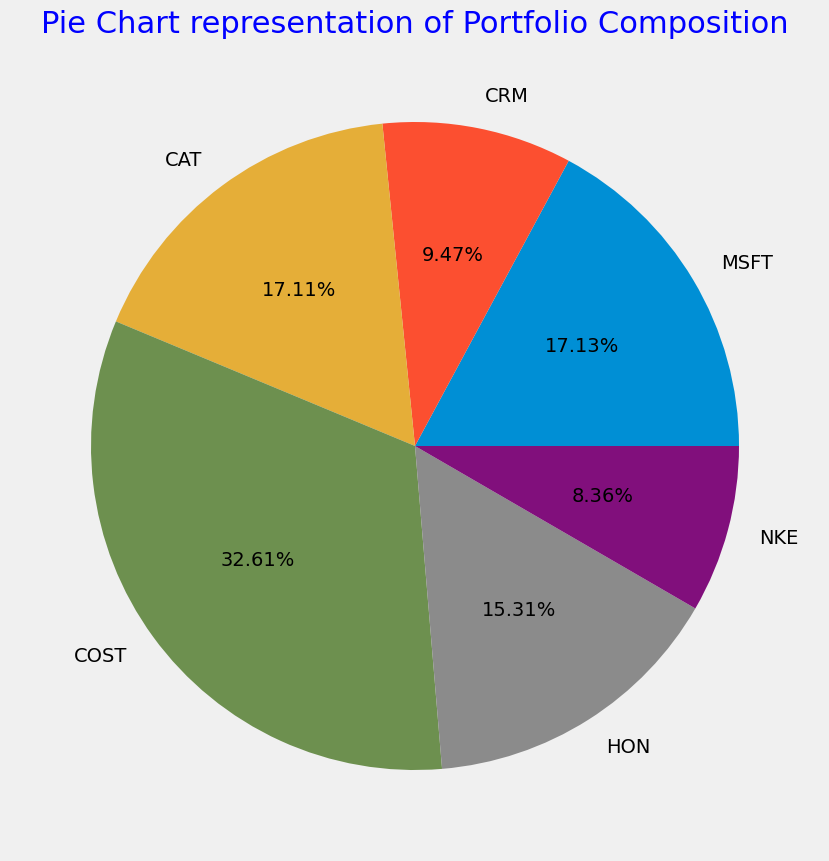

In [229]:
fig1, ax1 = plt.subplots(figsize = (10, 10))
sizes = portfolio_df['Quantity'] * portfolio_df['Close Price']

ax1.pie( sizes, labels = tickers, autopct = '%.2f%%', startangle=360)
ax1.set_title('Pie Chart Representation of Portfolio Composition', color='Blue', fontsize=22)

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [234]:
# Join your returns DataFrame to the original returns DataFrame
port_ret = combi_dr.sum(axis=1)
port_ret

Date
2022-01-04     0.000000
2022-01-05     3.648173
2022-01-06    -4.348543
2022-01-07    90.696194
2022-01-10    -4.787715
                ...    
2022-12-23    -9.123733
2022-12-27    -6.264344
2022-12-28   -10.771818
2022-12-29   -13.355630
2022-12-30    -7.267279
Length: 250, dtype: float64

In [277]:
fig = plt.figure( figsize = (18, 6))

ax1.hist(combi_trtn, bins=80)
ax1.set_xlabel("Portfolio Return")
ax1.set_ylabel("Frequency")
ax1.set_title("Total Portfolio Returns")
plt.show()

<Figure size 1800x600 with 0 Axes>

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [279]:
# Calculate the annualized `std`
combi_rtn_std = combi_rtn.std()

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

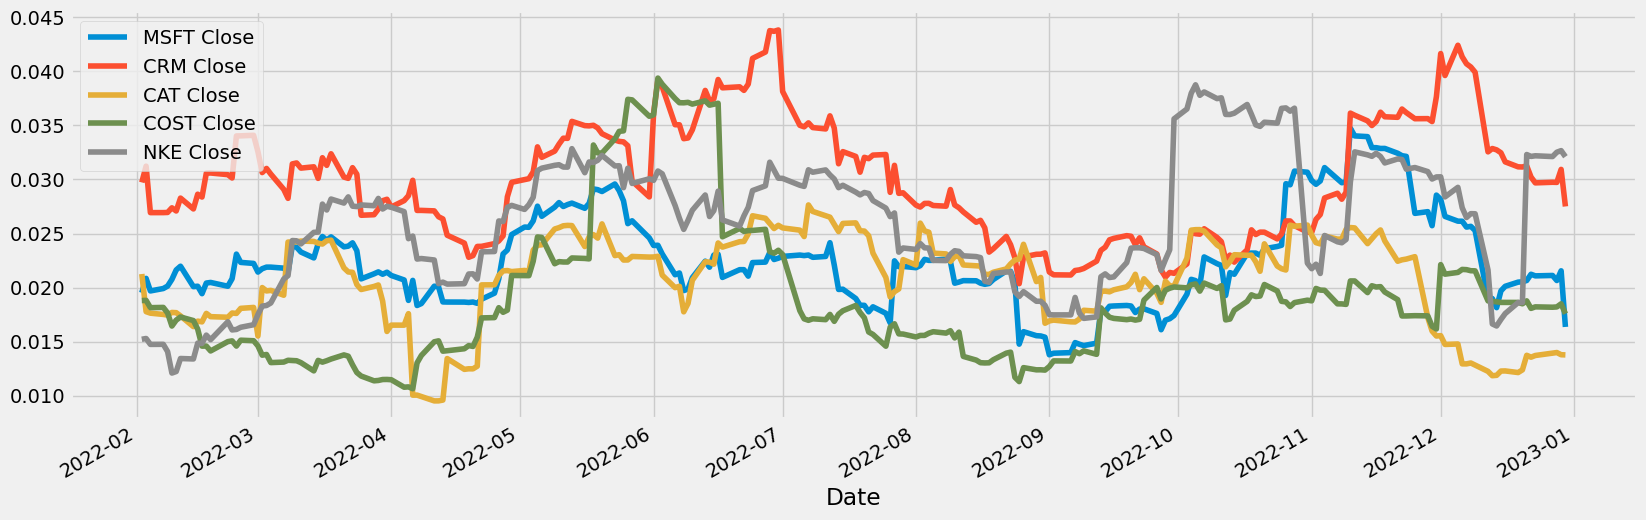

In [281]:
# Calculate rolling standard deviation
# Plot a rolling 7-day std dev of MSFT's closing prices
combi_rtn.rolling(window=21).std().plot(figsize = (18, 6))
# Plot rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

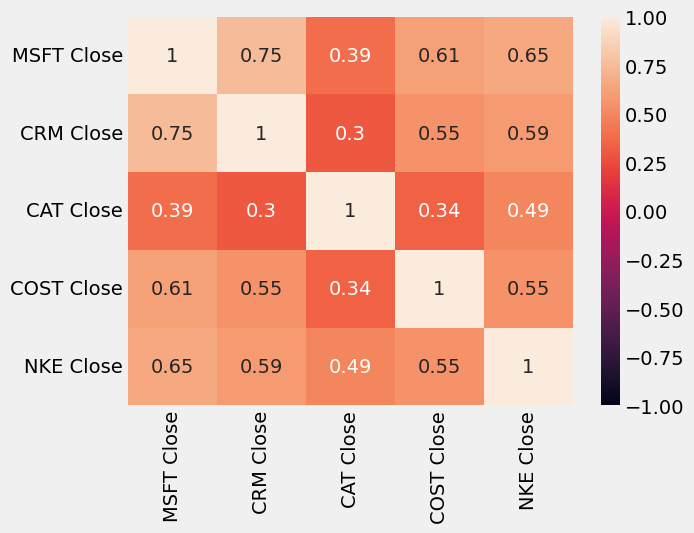

In [287]:
# Calculate and plot the correlation
price_correlation = combi_rtn.corr()
sns.heatmap(price_correlation, annot = True, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [295]:
spy_dr = spy.pct_change()

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of MSFT Returns vs. S&P 500 Returns'}, xlabel='Date'>

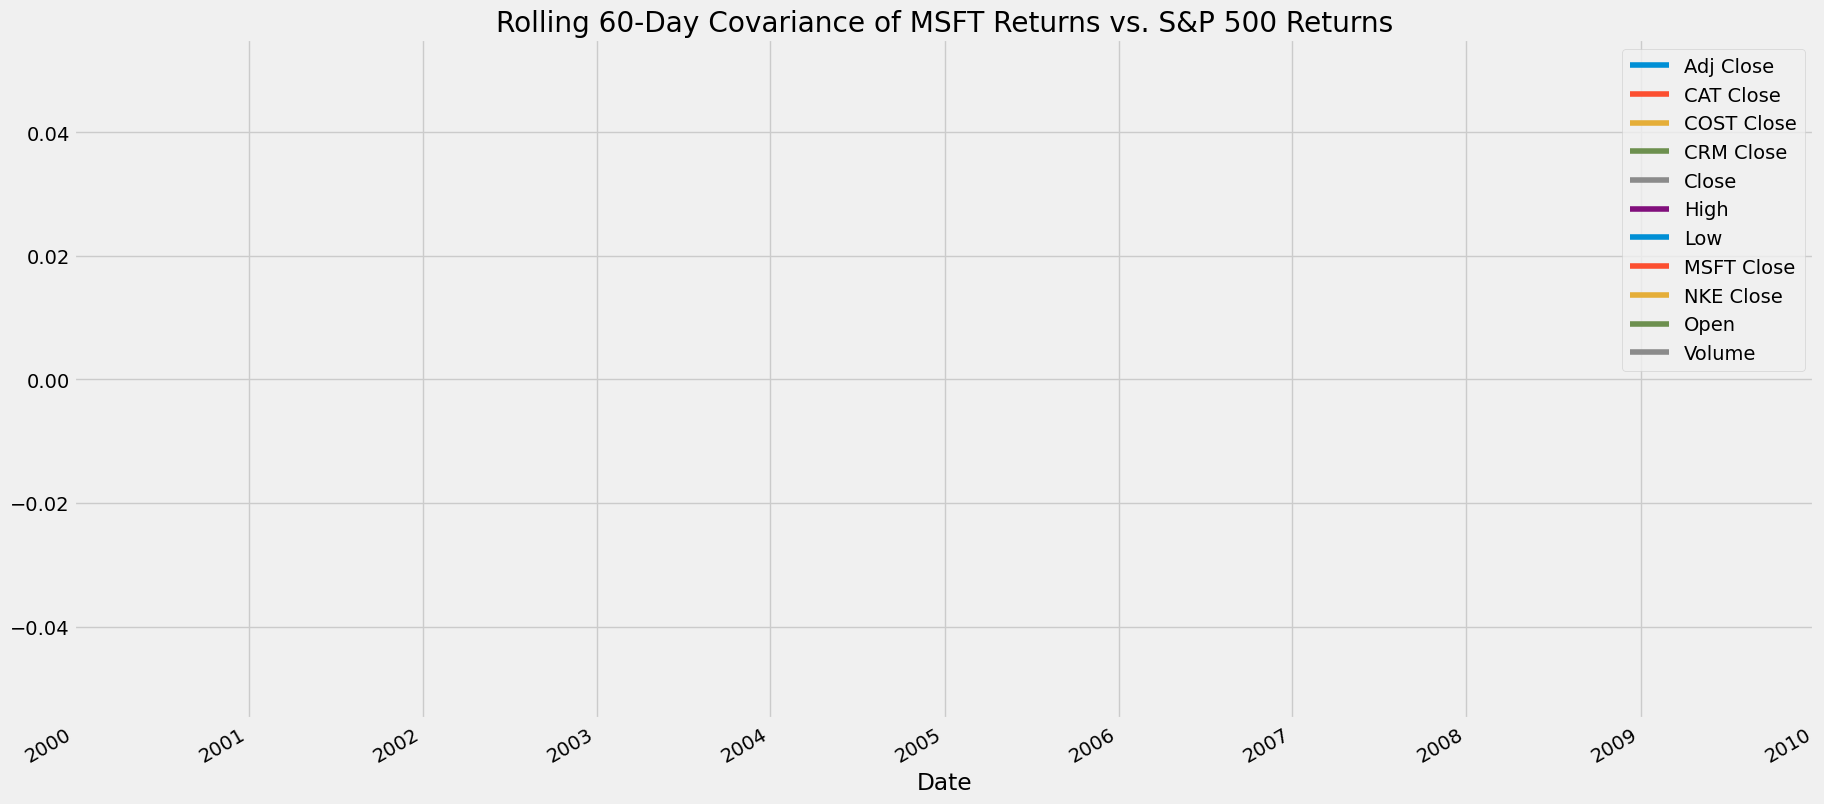

In [296]:
# Calculate and plot Beta
rolling_covariance = combi_rtn.rolling(window=60).cov(spy_dr)
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of MSFT Returns vs. S&P 500 Returns')


In [ ]:
rolling_variance = combi_rtn.rolling(window=60).var()

# Calculate 30-day rolling beta of MSFT and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta for the portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!